In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.plotly as py
#import plotly.graph_objs as go
import warnings
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
import os
import time

#Setting options
#init_notebook_mode(connected=True)
#warnings.filterwarnings("ignore")

#Set Default option
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_rows = 3000

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
## Data Preperation Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
## Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
## KNN Library
from sklearn.neighbors import KNeighborsClassifier
## Library for plotting
import matplotlib.pyplot as plt
## Library for calculating performance metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn import metrics
### Keras and Tensor flow libraries
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
#import matplotlib.pyplot as plt
## Library for calculating performance metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FastICA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from keras.models import Sequential
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector
from keras import regularizers
from keras.layers import Dense
from keras.optimizers import SGD, Adam

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [0]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [5]:
# Importing the dataset
df1 = pd.read_csv('sgemm_product.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MWG        241600 non-null  int64  
 1   NWG        241600 non-null  int64  
 2   KWG        241600 non-null  int64  
 3   MDIMC      241600 non-null  int64  
 4   NDIMC      241600 non-null  int64  
 5   MDIMA      241600 non-null  int64  
 6   NDIMB      241600 non-null  int64  
 7   KWI        241600 non-null  int64  
 8   VWM        241600 non-null  int64  
 9   VWN        241600 non-null  int64  
 10  STRM       241600 non-null  int64  
 11  STRN       241600 non-null  int64  
 12  SA         241600 non-null  int64  
 13  SB         241600 non-null  int64  
 14  Run1 (ms)  241600 non-null  float64
 15  Run2 (ms)  241600 non-null  float64
 16  Run3 (ms)  241600 non-null  float64
 17  Run4 (ms)  241600 non-null  float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


In [6]:
#checking for NA
df1.isnull().sum()

MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64

In [7]:
#Average runtime calculations
df1['average_runtime']=df1[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MWG              241600 non-null  int64  
 1   NWG              241600 non-null  int64  
 2   KWG              241600 non-null  int64  
 3   MDIMC            241600 non-null  int64  
 4   NDIMC            241600 non-null  int64  
 5   MDIMA            241600 non-null  int64  
 6   NDIMB            241600 non-null  int64  
 7   KWI              241600 non-null  int64  
 8   VWM              241600 non-null  int64  
 9   VWN              241600 non-null  int64  
 10  STRM             241600 non-null  int64  
 11  STRN             241600 non-null  int64  
 12  SA               241600 non-null  int64  
 13  SB               241600 non-null  int64  
 14  Run1 (ms)        241600 non-null  float64
 15  Run2 (ms)        241600 non-null  float64
 16  Run3 (ms)        241600 non-null  floa

In [8]:
df1=df1.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis=1)
df1.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,average_runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


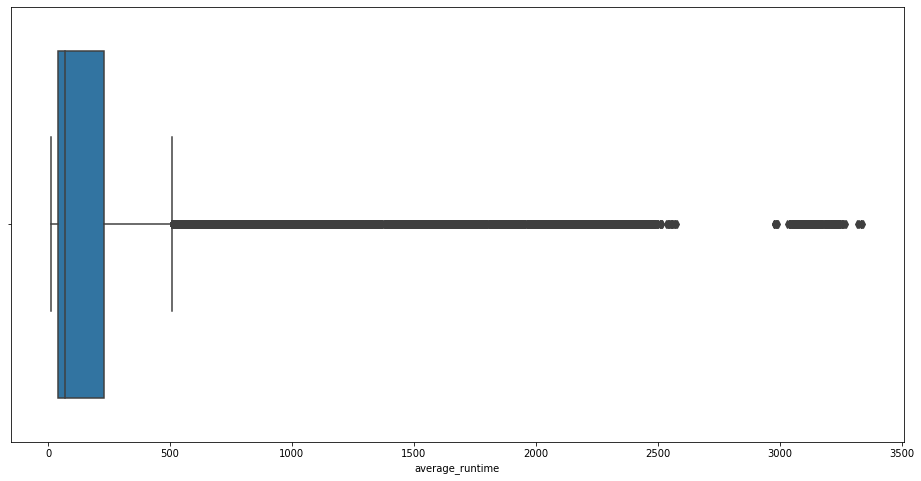

In [9]:
#finding outliers using boxplot
plt.figure(figsize=(16,8))
sns.boxplot(x='average_runtime', data = df1 )

In [0]:
#outlier removal
Q1=df1['average_runtime'].quantile(0.25)
Q3=df1['average_runtime'].quantile(0.75)
IQR = Q3 - Q1
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR

In [11]:
df2 = df1[(df1.average_runtime>LL) & (df1.average_runtime<UL)]
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,214833.0,75.688037,41.968313,16.0000,32.000,64.00,128.0000,128.0000
NWG,214833.0,75.761619,41.997377,16.0000,32.000,64.00,128.0000,128.0000
KWG,214833.0,25.592567,7.839899,16.0000,16.000,32.00,32.0000,32.0000
MDIMC,214833.0,14.475690,8.111065,8.0000,8.000,16.00,16.0000,32.0000
NDIMC,214833.0,14.470700,8.111264,8.0000,8.000,16.00,16.0000,32.0000
MDIMA,214833.0,17.390550,9.375134,8.0000,8.000,16.00,32.0000,32.0000
NDIMB,214833.0,17.388762,9.374445,8.0000,8.000,16.00,32.0000,32.0000
KWI,214833.0,5.005544,3.000002,2.0000,2.000,8.00,8.0000,8.0000
VWM,214833.0,2.339538,1.858623,1.0000,1.000,2.00,4.0000,8.0000
VWN,214833.0,2.345156,1.862122,1.0000,1.000,2.00,4.0000,8.0000


In [12]:
#converting average_runtime into 1 and 0 form for sv

mean = df2['average_runtime'].mean()
df2.loc[df2['average_runtime'] <= mean, 'average_runtime'] = 0
df2.loc[df2['average_runtime'] > mean, 'average_runtime'] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
x1 = df2.iloc[:,1:14].values 

y1 = df2.iloc[:,14].values

In [0]:
#splitting the data into test set and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.3, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:
x1.shape

(214833, 13)

## K Means


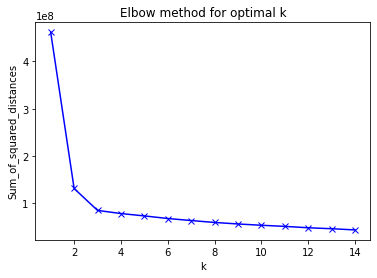

In [48]:
##Determining number of clusters
from sklearn.cluster import KMeans 
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km=km.fit(x1)
    Sum_of_squared_distances.append(km.inertia_)
    
##Checking out which SSE is low for different types of k means value
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

Text(0.5, 1.0, 'KMeans on Full Data')

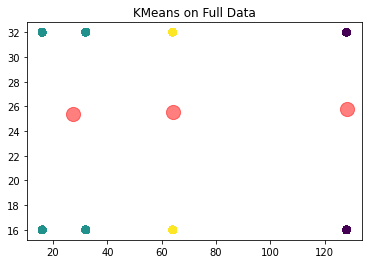

In [49]:
## K-Means Clustering Algorithm  
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) 
kmeans.fit(x1)
yp=kmeans.predict(x1)
plt.scatter(x1[:, 0], x1[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans on Full Data')

In [50]:
yp.shape

(214833,)

## Expectation Maximization


Text(0.5, 1.0, 'Expectation Maximization on Full Data')

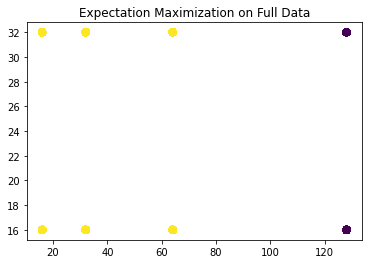

In [51]:
## Expectation maximization analysis on Train set
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
em.fit(x1)
em_pred = em.predict(x1)
plt.scatter(x1[:, 0], x1[:, 1], c=em_pred, s=50, cmap='viridis_r')
plt.title('Expectation Maximization on Full Data')

## PCA


In [0]:
from sklearn.decomposition import PCA
pca = PCA()
pca_X_train=pca.fit_transform(x1)

In [53]:
explained_variance=pca.explained_variance_ratio_
explained_variance.shape

(13,)

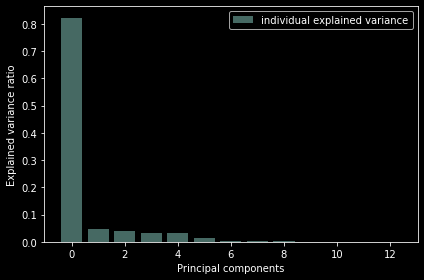

In [54]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(13), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [0]:
pca = PCA(n_components=2)
pca_X_train=pca.fit_transform(x1)

In [56]:
explained_variance=pca.explained_variance_ratio_
explained_variance.shape

(2,)

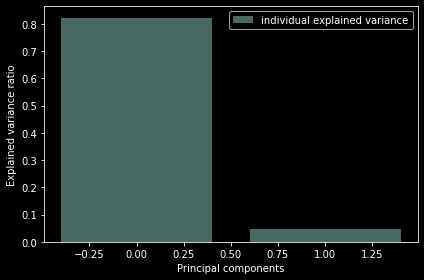

In [57]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(2), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

## K-MEANS with PCA


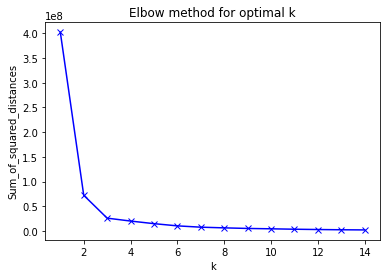

In [58]:
##Determining number of clusters
from sklearn.cluster import KMeans 
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km=km.fit(pca_X_train)
    Sum_of_squared_distances.append(km.inertia_)
    
##Checking out which SSE is low for different types of k means value
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

Text(0.5, 1.0, 'KMeans on full dataset')

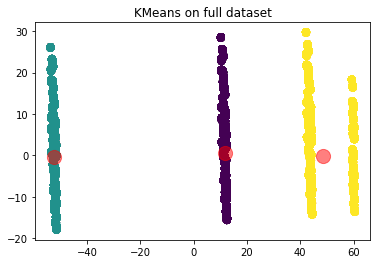

In [59]:
## K-Means Clustering Algorithm  
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) 
kmeans.fit(pca_X_train)
yp=kmeans.predict(pca_X_train)
plt.scatter(pca_X_train[:, 0], pca_X_train[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans on full dataset')

## EXPECTATION MAXIMIZATION WITH PCA


Text(0.5, 1.0, 'Expectation Maximization on full data set')

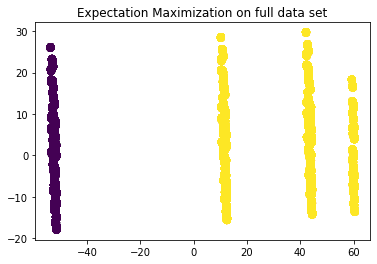

In [60]:
## Expectation maximization analysis on Train set
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
em.fit(pca_X_train)
em_pred = em.predict(pca_X_train)
plt.scatter(pca_X_train[:, 0], pca_X_train[:, 1], c=em_pred, s=50, cmap='viridis_r')
plt.title('Expectation Maximization on full data set')

In [0]:
from sklearn.decomposition import PCA
pca = PCA()
pca_X1_ann=pca.fit_transform(x1)


In [0]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(pca_X1_ann, y1, test_size = 0.3, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_pca = sc.fit_transform(X_train_pca)
X_test_pca = sc.transform(X_test_pca)

In [21]:
# Initialising the ANN

#changing the number of nodes to 16
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=13, units=16, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=16, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(X_train_pca, y_train, batch_size = 10, epochs = 400,validation_split=0.3)



Train on 105268 samples, validate on 45115 samples
Epoch 1/400
105268/105268 [==============================] - 16s 151us/step - loss: 0.4797 - accuracy: 0.7634 - val_loss: 0.4486 - val_accuracy: 0.7704
Epoch 2/400
105268/105268 [==============================] - 16s 150us/step - loss: 0.4313 - accuracy: 0.7761 - val_loss: 0.4209 - val_accuracy: 0.7815
Epoch 3/400
105268/105268 [==============================] - 16s 151us/step - loss: 0.4174 - accuracy: 0.7823 - val_loss: 0.4202 - val_accuracy: 0.7765
Epoch 4/400
105268/105268 [==============================] - 16s 151us/step - loss: 0.4110 - accuracy: 0.7846 - val_loss: 0.4109 - val_accuracy: 0.7838
Epoch 5/400
105268/105268 [==============================] - 16s 153us/step - loss: 0.4066 - accuracy: 0.7859 - val_loss: 0.4082 - val_accuracy: 0.7847
Epoch 6/400
105268/105268 [==============================] - 16s 151us/step - loss: 0.4029 - accuracy: 0.7871 - val_loss: 0.4044 - val_accuracy: 0.7849
Epoch 7/400
105268/105268 [==========

In [30]:
# Predicting the Test set results
y_pred = classifier.predict_classes(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_test,y_pred)
print(cm,"\n")
print("The accuracy is",accu)

ValueError: ignored

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


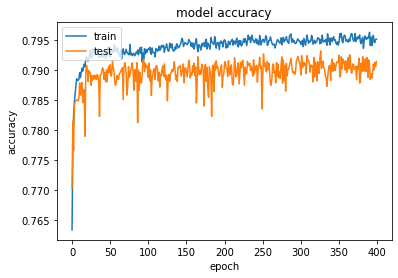

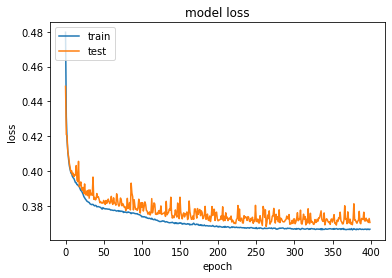

In [23]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##ICA


In [0]:
##ICA
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=3, random_state=12) 
X_ICA=ICA.fit_transform(x1)

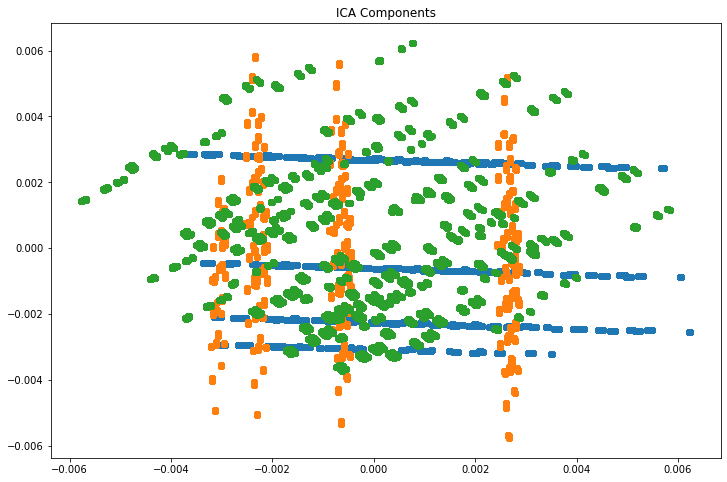

In [74]:
plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(X_ICA[:,0], X_ICA[:,1])
plt.scatter(X_ICA[:,1], X_ICA[:,2])
plt.scatter(X_ICA[:,2], X_ICA[:,0])

## K-Means


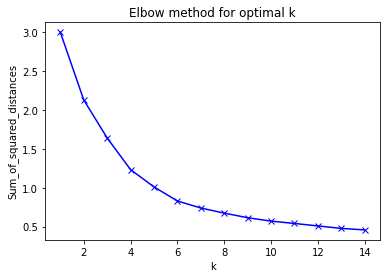

In [76]:
##Determining number of clusters
from sklearn.cluster import KMeans 
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km=km.fit(X_ICA)
    Sum_of_squared_distances.append(km.inertia_)
    
##Checking out which SSE is low for different types of k means value
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

Text(0.5, 1.0, 'KMeans on full data')

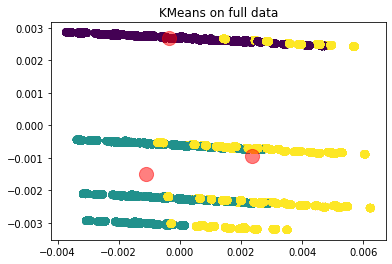

In [79]:
kmeans_ica = KMeans(n_clusters=6, random_state=100)
kmeans_ica.fit(X_ICA)
yp=kmeans.fit_predict(X_ICA)
plt.scatter(X_ICA[:, 0], X_ICA[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans on full data')

## Expectation Maximization


Text(0.5, 1.0, 'Expectation Maximization on full data set')

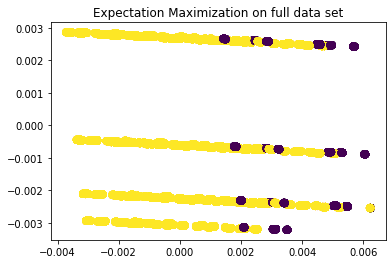

In [80]:
## Expectation maximization analysis on Train set
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
em.fit(X_ICA)
em_pred = em.fit_predict(X_ICA)
plt.scatter(X_ICA[:, 0], X_ICA[:, 1], c=em_pred, s=50, cmap='viridis_r')
plt.title('Expectation Maximization on full data set')

## RCA


In [0]:
##Randomized Projection
from sklearn.random_projection import GaussianRandomProjection
grp = GaussianRandomProjection(n_components=3, eps=0.1, random_state=420)
rca_X = grp.fit_transform(x1)

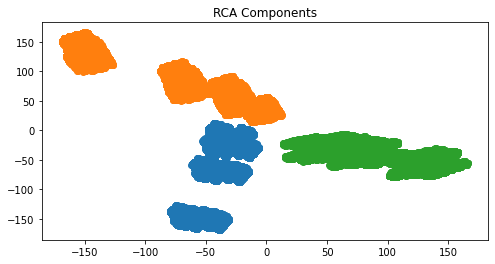

In [112]:
plt.figure(figsize=(8,4))
plt.title('RCA Components')
plt.scatter(rca_X[:,0], rca_X[:,1])
plt.scatter(rca_X[:,1], rca_X[:,2])
plt.scatter(rca_X[:,2], rca_X[:,0])

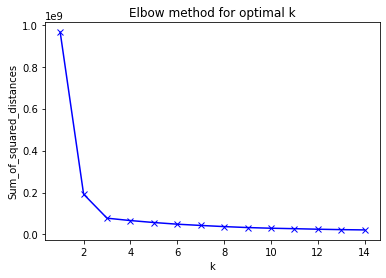

In [98]:
##Determining number of clusters
from sklearn.cluster import KMeans 
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km=km.fit(rca_X)
    Sum_of_squared_distances.append(km.inertia_)
    
##Checking out which SSE is low for different types of k means value
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

# K-Means with RCA


Text(0.5, 1.0, 'KMeans on full dataset')

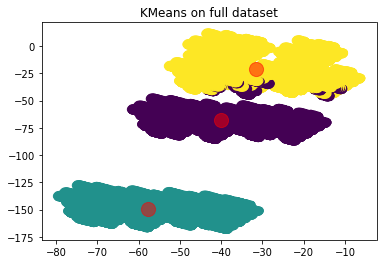

In [99]:
## K-Means Clustering Algorithm  
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) 
kmeans.fit(rca_X)
yp=kmeans.predict(rca_X)
plt.scatter(rca_X[:, 0], rca_X[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans on full dataset')

## Expectation Maximization



Text(0.5, 1.0, 'Expectation Maximization on full data set')

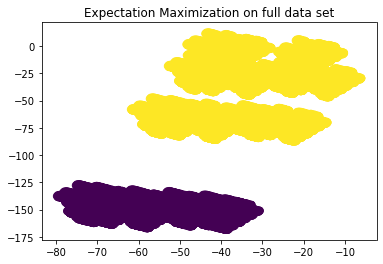

In [100]:
## Expectation maximization analysis on Train set
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=2,random_state=0,covariance_type='tied')
em.fit(rca_X)
em_pred = em.predict(rca_X)
plt.scatter(rca_X[:, 0], rca_X[:, 1], c=em_pred, s=50, cmap='viridis_r')
plt.title('Expectation Maximization on full data set')

## Feature Selection


In [0]:
##Feature Selection
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),  
           k_features=7,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=2)



In [115]:
features = feature_selector.fit(x1,y1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   43.3s finished

[2020-05-06 03:22:23] Features: 1/7 -- score: 0.5909781999086686[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   44.0s finished

[2020-05-06 03:23:07] Features: 2/7 -- score: 0.6272503179910707[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   43.2s finished

[2020-05-06 03:23:50] Features: 3/7 -- score: 0.6446312348185387[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [116]:
filtered_features= features.k_feature_idx_
filtered_features

(2, 3, 4, 6, 9, 10, 12)

In [0]:
X_feature = np.array(df2.iloc[:,[2,3,4,6,9,10,12]])
y_feature = np.array(df2['average_runtime'])

In [121]:
X_feature.shape

(214833, 7)

In [0]:
X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_feature, y_feature, test_size=0.3, random_state=1)

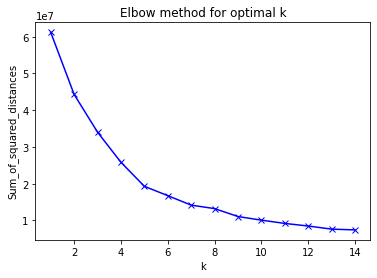

In [123]:
##Determining number of clusters
from sklearn.cluster import KMeans 
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km=km.fit(X_feature)
    Sum_of_squared_distances.append(km.inertia_)
    
##Checking out which SSE is low for different types of k means value
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

Text(0.5, 1.0, 'KMeans on full dataset')

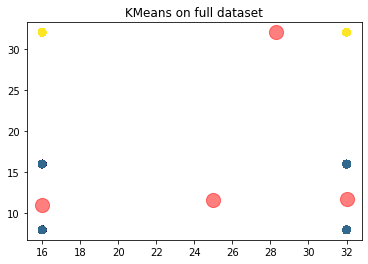

In [125]:
## K-Means Clustering Algorithm  
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4) 
kmeans.fit(X_feature)
yp=kmeans.predict(X_feature)
plt.scatter(X_feature[:, 0], X_feature[:, 1], c=yp, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('KMeans on full dataset')

Text(0.5, 1.0, 'Expectation Maximization on full data set')

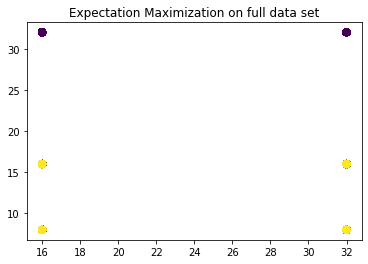

In [127]:
## Expectation maximization analysis on Full data set
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=4,random_state=0,covariance_type='tied')
em.fit(X_feature)
em_pred = em.predict(X_feature)
plt.scatter(X_feature[:, 0], X_feature[:, 1], c=em_pred, s=50, cmap='viridis_r')
plt.title('Expectation Maximization on full data set')

## TASK 5





In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, n_init=10, max_iter=300, init = 'k-means++', random_state = 2)
prediction = kmeans.fit_predict(X_train)

em = GaussianMixture(n_components=2,random_state=2,covariance_type='tied')
em_pred = em.fit_predict(X_train)
em_probs = em.predict_proba(X_train)

train_df = pd.DataFrame()
train_df['KM_Pred']=prediction
train_df['EM_Prob']=em_probs[:,1]
train_df['y']=y_train
train_df

,KM_Pred,EM_Prob,y
0,1,9.999995e-01,1.0
1,0,1.063441e-09,0.0
2,0,2.482059e-10,1.0
3,0,1.511451e-09,0.0
4,1,9.999999e-01,1.0
...,...,...,...
150378,0,1.382699e-04,1.0
150379,1,9.999997e-01,1.0
150380,0,5.779021e-05,0.0
150381,0,4.525326e-04,0.0


In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, n_init=10, max_iter=300, init = 'k-means++', random_state = 2)
prediction = kmeans.fit_predict(X_test)

em = GaussianMixture(n_components=2,random_state=2,covariance_type='tied')
em_pred = em.fit_predict(X_test)
em_probs = em.predict_proba(X_test)

test_df = pd.DataFrame()
test_df['KM_Pred']=prediction
test_df['EM_Prob']=em_probs[:,1]
test_df['y']=y_test
test_df

,KM_Pred,EM_Prob,y
0,0,2.179784e-04,1.0
1,1,9.999993e-01,0.0
2,0,5.510730e-05,0.0
3,1,9.999993e-01,0.0
4,0,1.499440e-04,0.0
...,...,...,...
64445,1,9.999996e-01,0.0
64446,0,1.252054e-04,0.0
64447,0,8.254326e-12,1.0
64448,1,9.999988e-01,0.0


In [0]:

train_y=train_df[['y']].values
train_x=train_df.drop(columns=['y'],axis=1).values
test_y=test_df[['y']]
test_x=test_df.drop(columns=['y'],axis=1)

In [27]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(32,activation="softmax"))

# Adding the second hidden layer
classifier.add(Dense(16,activation="softmax"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(train_x, train_y, batch_size = 10, epochs=100,validation_split=0.3)

Train on 105268 samples, validate on 45115 samples
Epoch 1/100
105268/105268 [==============================] - 17s 158us/step - loss: 0.6069 - accuracy: 0.6708 - val_loss: 0.6030 - val_accuracy: 0.6679
Epoch 2/100
105268/105268 [==============================] - 17s 158us/step - loss: 0.6015 - accuracy: 0.6708 - val_loss: 0.6034 - val_accuracy: 0.6679
Epoch 3/100
105268/105268 [==============================] - 16s 151us/step - loss: 0.6015 - accuracy: 0.6696 - val_loss: 0.6030 - val_accuracy: 0.6679
Epoch 4/100
105268/105268 [==============================] - 19s 184us/step - loss: 0.6016 - accuracy: 0.6706 - val_loss: 0.6030 - val_accuracy: 0.6679
Epoch 5/100
105268/105268 [==============================] - 17s 161us/step - loss: 0.6015 - accuracy: 0.6705 - val_loss: 0.6032 - val_accuracy: 0.6679
Epoch 6/100
105268/105268 [==============================] - 17s 158us/step - loss: 0.6015 - accuracy: 0.6709 - val_loss: 0.6033 - val_accuracy: 0.6679
Epoch 7/100
105268/105268 [==========

In [28]:
# Predicting the Test set results
y_pred = classifier.predict_classes(test_x)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(test_y, y_pred)
accu=accuracy_score(test_y,y_pred)
print(cm,"\n")
print("The accuracy is",accu)


[[43184     0]
 [21266     0]] 

The accuracy is 0.6700387897595035


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


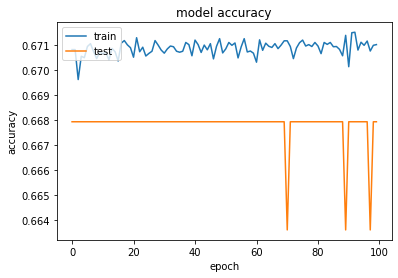

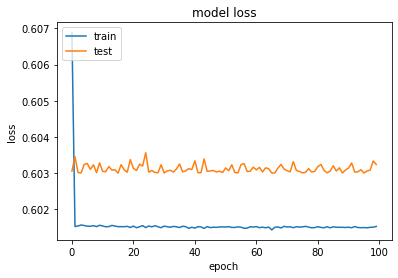

In [29]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()